# Investigating Reaction Kinetics

I have a set of data reporting the concentrations over time for the following reaction.

$$ A \xrightarrow{k_1} B \\
A \xrightarrow{k_2} C$$

There are two possible products. Can we find both rate constants from the observation of concentrations over time?

*Note: To use this notebook, you must create a data file using the data set at the very end of this document.*

## Order of Reaction 

First, we will load in the data and make a quick plot. We observe that the two products are not being produced at equal rates.  This is consistent with the reaction scheme.  Each product is produced by a different reaction and each has its own rate constant. From the plot that correctly describes the decay of reactant, we can also obtain the overall rate consant, $k_{obs} = k_1 + k_2$. For more see the tutorial document on [Integrating Rate Equations](https://moodle31.upei.ca/mod/resource/view.php?id=623407) available on the Moodle site..

../data/Mystery_Reaction.csv


,time,Reactant,Product A,Product B
0,0.0000,0.250,NaN,NaN
1,0.0195,0.231,0.00563,0.0131
2,0.0416,0.213,0.01090,0.0267


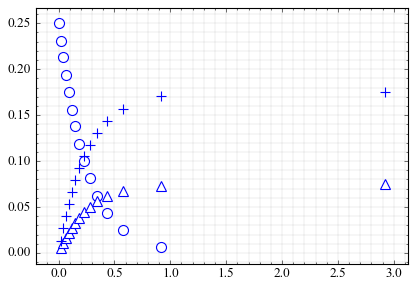

In [3]:
#######################
### import packages ###
#######################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "https://raw.githubusercontent.com/blinkletter/StealThisCode/main/"
#path = "../"
#########################################
### Setup a figure with a single plot ###
### and choose a stylesheet           ###
#########################################

plt.style.use(path +  "S2_classic2.mplstyle")                    # This stylesheet must be in same folder as this notebook      
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))  # setup figure and plot (ax) within figure
ax.margins(x=.07, y=.07, tight=True)                     # add 7% empty space around outside of plot area   


#####################
### Load data set ###
#####################

filename = "data/Mystery_Reaction.csv"

print(path + filename)
df = pd.read_csv(path + filename)         # Load data from .csv format into dataframe
display(df.head(3))                # Show header and first three lines of dataframe


#############################
### Plot each data series ###
#############################

ax.plot(df["time"], df["Reactant"], "o")
ax.plot(df["time"], df["Product A"], "^")  # "^" will give a diamond data marker
ax.plot(df["time"], df["Product B"], "+")

#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot

## Linear Models

We know the integrated rate laws for 1$^{st}$ and 2$^{nd}$ order reactions and we can plot the linearized versions of these rate laws for the dissappearance of the reactant.

| Reaction | Order | Rate Law | Integrated Law | Linear Form |
| :--: | :--: | :--: | :--: | :--: |
| $${A}\xrightarrow{k_{obs}}{P}$$ | 1 | $$-\frac{\partial A}{\partial t}  = k_{obs}\cdot A$$ | $$ A_t = A_0 \cdot e^{-k_{obs}t}$$ | $$ \ln{A_t}  = \ln{A_t} - k\cdot t$$ | 
| $${2A}\xrightarrow{k_{obs}}{P}$$ | 2 | $$-\frac{\partial A}{\partial t} = k_{obs}\cdot A^2$$ | $$ {A_t} = \frac{A_0}{1 + A_0k_{obs} t}$$ | $$ \frac{1}{A_t} = \frac{1}{A_0} + k_{obs}\cdot t$$ |

I expect this to to be a first order reaction because both reactions that consume the reactant are first order. Let us plot the two linear models and see if that is indeed the case.

We will plot $\ln{A_t}$ vs. $t$ and $\frac{1}{\left[ A_t \right]}$ vs. $t$.

*As a bonus, the code below will show you how to make two plots within a figure.*

### Observations

The reaction is indeed first order and the rate constant was found to be $4.01~s^{-1}$ for dissappearance of reactant. Assuming that the two products are the only products, we can get the rate consant for each by the ratio of product A to product B. In the example below I just used the ratio at a given time point.

,time,Reactant,Product A,Product B
1,0.0195,0.231,0.00563,0.0131
2,0.0416,0.213,0.01090,0.0267
3,0.0646,0.194,0.01630,0.0400


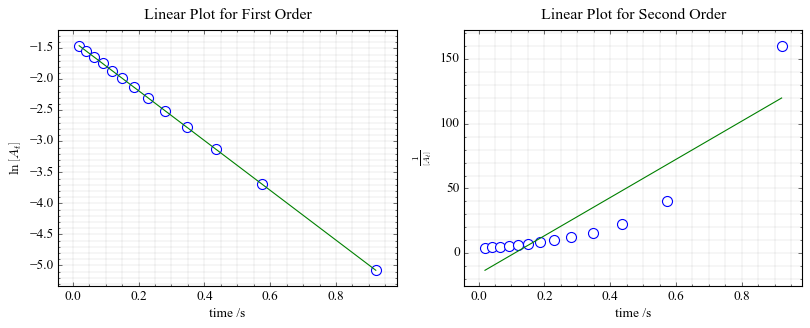

The reaction is first order with a rate constant of 4.01 +/- 0.010 s^-1 
The rate consant for formation of Product A is 1.16
The rate consant for formation of Product B is 2.85


In [ ]:
#######################
### import packages ###
#######################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


#####################
### Load data set ###
#####################

filename = "Mystery_Reaction.csv"
df = pd.read_csv(path + "6_PhysOrgExamples/" + filename)         # Load data from .csv format into dataframe

df = df.dropna()                   # strip away any lines with "NaN" values (blanks)
display(df.head(3))                # Show header and first three lines of dataframe


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

plt.style.use(path + "S2_classic2.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))  
ax[0].margins(x=.07, y=.07, tight=True)                     # add 7% empty space around outside of plot area   
ax[1].margins(x=.07, y=.07, tight=True)                     # add 7% empty space around outside of plot area   


#####################################################
### Get series of data to plot from the dataframe ###
#####################################################

ReciprocalA = 1/df["Reactant"]
lnA = np.log(df["Reactant"])
t = df["time"]


#########################################
### The first plot is in position 0.  ###
### ax[0] addresses that plot.        ###
#########################################

ax[0].plot(t, lnA, "o")
ax[0].set(title="Linear Plot for First Order",       
          ylabel=r"$\ln{\left[ A_t \right]}$", 
          xlabel="time /s",                
#          xlim=[0,100],                  
#          ylim=[-1,7]
         )

### Linear line fit and plot the line fit ###

linfit1 = linregress(t, lnA)
fity = linfit1.slope*t + linfit1.intercept
ax[0].plot(t, fity, "-")


##########################################
### The second plot is in position 0.  ###
### ax[0] addresses that plot.         ###
##########################################

ax[1].plot(t, ReciprocalA, "o")
ax[1].set(title="Linear Plot for Second Order",       
          ylabel=r"$\frac{1}{\left[ A_t \right]}$", 
          xlabel="time /s",                
#          xlim=[0,100],                  
#          ylim=[-1,7]
         )

### Linear line fit and plot the line fit ###

linfit2 = linregress(t, ReciprocalA)
fity=linfit2.slope*t+linfit2.intercept
ax[1].plot(t, fity, "-")

#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined four plots


################################################
### Print out the calculated rate constants  ###
################################################

k = -linfit1.slope 
                                                                       # 2 * stderr = 95% confidence interval
print(f"The reaction is first order with a rate constant of {k:0.2f} +/- {2*linfit1.stderr:0.3f} s^-1 ")

k_A = k * df["Product A"][5]/(df["Product A"][5]+df["Product B"][5])   # I used the ratio at time point #5
print(f"The rate consant for formation of Product A is {k_A:0.2f}")

k_B = k * df["Product B"][5]/(df["Product A"][5]+df["Product B"][5])
print(f"The rate consant for formation of Product B is {k_B:0.2f}")


## Curve Fits

Linear fits are so "Excel". The modern chemist might choose to fit the data to the model directly. We have two models, the integrated rate equations for $1^{st}$ and $2^{nd}$ order reactions.

First we will define two functions that describe each case and then fit the data for \[Reactant\] against them. Note the code below.

### Observations 

The first order fit matched the data and the second order fit did not.

,time,Reactant,Product A,Product B
1,0.0195,0.231,0.00563,0.0131
2,0.0416,0.213,0.01090,0.0267
3,0.0646,0.194,0.01630,0.0400


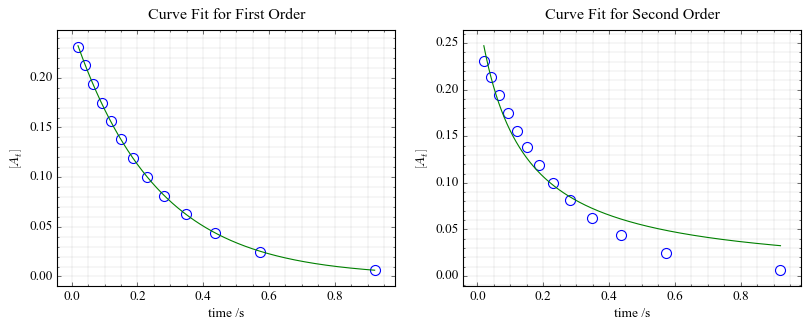

The reaction is first order with a rate constant of 4.00


In [ ]:
#######################
### import packages ###
#######################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


#####################
### Load data set ###
#####################

filename = "Mystery_Reaction.csv"
df = pd.read_csv(path + "6_PhysOrgExamples/" + filename)         # Load data from .csv format into dataframe

df = df.dropna()                   # strip away any lines with "NaN" values (blanks)
display(df.head(3))                # Show header and first three lines of dataframe


####################################################
### Functions that define models for curve fits  ###
####################################################

### Define function for first order integrated rate law
def First(t, k, A0):
    A = A0*np.exp(-k*t)
    return A

### Define function for second order integrated rate law
def Second(t, k, A0):
    A = A0/(1+A0*k*t)
    return A


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

plt.style.use(path + "S2_classic2.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))  
ax[0].margins(x=.07, y=.07, tight=True)                     # add 7% empty space around outside of plot area   
ax[1].margins(x=.07, y=.07, tight=True)                     # add 7% empty space around outside of plot area   


#####################################################
### Get series of data to plot from the dataframe ###
#####################################################

At = df["Reactant"]
t = df["time"]


#########################################
### The first plot is in position 0.  ###
### ax[0] addresses that plot.        ###
#########################################

ax[0].plot(t, At, "o")
ax[0].set(title="Curve Fit for First Order",       
          ylabel=r"$\left[ A_t \right]$", 
          xlabel="time /s",                
#          xlim=[0,100],                  
#          ylim=[-1,7]
          )   

### perform curve fit for first order reaction.
popt1, pcov1 = curve_fit(First, t, At) 
### curve_fit returns a list of optimized parameters (popt) and matrix of covariance values (pcov)

#print(popt)
k = popt1[0]   # optimized parameters are in the order in which the appear in the function definition
A0 = popt1[1]

### plot curve fit for first order reaction.
t_series = np.linspace(np.min(t), np.max(t), 1000)
fity=First(t_series, k, A0)
ax[0].plot(t_series, fity, "-")


##########################################
### The second plot is in position 0.  ###
### ax[0] addresses that plot.         ###
##########################################

ax[1].plot(t, At, "o")
ax[1].set(title="Curve Fit for Second Order",       
          ylabel=r"$\left[ A_t \right]$", 
          xlabel="time /s",                
#          xlim=[0,100],                  
#          ylim=[-1,7]
          )                   

### perform curve fit for second order reaction.
popt2, pcov2 = curve_fit(Second, t, At)
#print(popt)
k = popt2[0]
A0 = popt2[1]

### plot curve fit for first order reaction.
t_series = np.linspace(np.min(t), np.max(t), 1000)
fity=Second(t_series, k, A0)
ax[1].plot(t_series, fity, "-")


#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined four plots


k = popt1[0]
print(f"The reaction is first order with a rate constant of {k:0.2f}")


## Evaluating the Curve Fits

The `SciPy.optimize.curve_fit()` function does not calculate the value of $R^2$. This is because the authors of that tool do not consider $R^2$ to be a useful measure of fit quality. I am not statistician, but I do agree with them.

Nevertheless, we as chemists see $R^2$ used all the time. So let's be bad and use it here. The code below will calculate the $R^2$ for each plot.

One better way to evaluate a fit is to plot the residuals. If error is random and the fit is good then the residuals should appear evenly above and below zero.  But if the fit is not good, we will see the residuals drift up and down as the model deviates from the data beyond random error.

Also, in the code below is the plots of the residuals. I plotted both using the same scale. Which method is more convincing?

### Observations

The values of $R^2$ for both fits are great! One is perfect and the other is still a good value by the standards of physical organic chemistry ($R^2 > 0.95$ is considered a good fit by almost everyone except analytical chemists). If we had just relied on the $R^2$ values alone we might have choosen the wrong model. 

But, you chose the right model because you used you eyes to look at the fits and one clearly did not match. Always plot the curve fit on the data and judge harshly to evaluate a curve fit.  A more rigourous way would be to plot the residuals. The residuals were fairly evenly distributed above and below the zero line in both cases (hence the seemingly good $R^2$ scores) but we clearly see that one is not random and has a systematic deviation diagnostic of a poor model fit.



,time,Reactant,Product A,Product B
1,0.0195,0.231,0.00563,0.0131
2,0.0416,0.213,0.01090,0.0267
3,0.0646,0.194,0.01630,0.0400


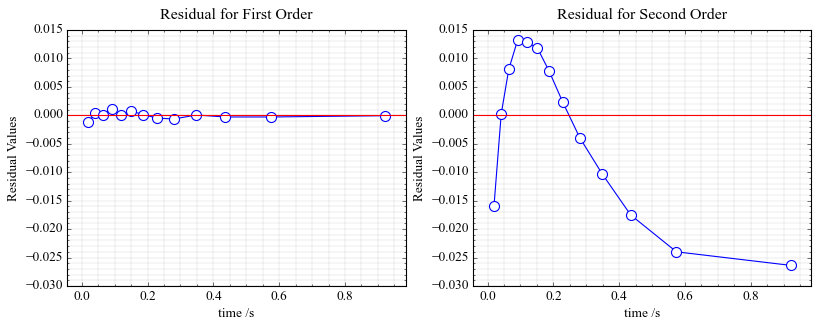

the R^2 value for the first-order model fit is 0.9999
the R^2 value for the second-order model fit is 0.9599


In [ ]:
#####################
### Load data set ###
#####################

filename = "Mystery_Reaction.csv"
df = pd.read_csv(path + "6_PhysOrgExamples/" + filename)         # Load data from .csv format into dataframe

df = df.dropna()                   # strip away any lines with "NaN" values (blanks)
display(df.head(3))                # Show header and first three lines of dataframe


#####################################################
### Get series of data to plot from the dataframe ###
#####################################################

At = df["Reactant"]
t = df["time"]

xdata=t   # The code that I stole from the web uses these terms for x and y data.
ydata=At


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

plt.style.use(path + "S2_classic2.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))  
ax[0].margins(x=.07, y=.07, tight=True)                     # add 7% empty space around outside of plot area   
ax[1].margins(x=.07, y=.07, tight=True)                     # add 7% empty space around outside of plot area   


################################################
### Calculate R^2 for first-order model fit  ###
################################################

residuals = ydata- First(xdata, *popt1)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared_model_1 = 1 - (ss_res / ss_tot)


#########################################################
### Plot the residuals for first-order model in ax[0] ###
#########################################################

ax[0].plot(xdata, residuals, "o-")
ax[0].axhline(y = 0.0, color = 'r', linestyle = '-')
ax[0].set(title="Residual for First Order",       
          ylabel=r"Residual Values", 
          xlabel="time /s",                
          ylim=[-0.030,0.015],       # I set the y-axis limits so both plots have same scale           
#          xlim=[-1,7]
          )   


#################################################
### Calculate R^2 for second-order model fit  ###
#################################################

residuals = ydata- Second(xdata, *popt2)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared_model_2 = 1 - (ss_res / ss_tot)

##########################################################
### Plot the residuals for second-order model in ax[1] ###
##########################################################

ax[1].plot(xdata, residuals, "o-")
ax[1].axhline(y = 0.0, color = 'r', linestyle = '-')
ax[1].set(title="Residual for Second Order",       
          ylabel=r"Residual Values", 
          xlabel="time /s",                
          ylim=[-0.030,0.015],                  
#          xlim=[-1,7]
          )   


#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the two plots


###########################################
### print the calculated values for R^2 ###
###########################################

print(f"the R^2 value for the first-order model fit is {r_squared_model_1:0.4f}")
print(f"the R^2 value for the second-order model fit is {r_squared_model_2:0.4f}")



## The Two products

We fit the disappearance of reactant to the first order model and obtained a value for the rate constant for the change. However, that rate constant is actually the total value of the two rate constants. The reactions were...


$$ A \xrightarrow{k_1} B \\
A \xrightarrow{k_2} C$$

And the rate constant for dissappearance of reactant, $k_{obs}$, is $k_1 + k_2$. We can easily obtain these values since we know the total and the ratio between then. The ratio of the rate consants will be the ratio of the concentrations of the two products.

We could also calculate the total rate consant, $k_{obs}$ with a curve fit of the products vs. time. The integrated rate equation for product in a first order reaction is...

$$P_t = P_\infty - \cdot P_\infty e^{-k_{obs}t}$$

We don't know the final concentration of product, $P_\infty$, but if we have enough data the curve fit should be able to determine it as well. The code below fits the data for the two products to the integrated rate equation above. Remember that $k_{obs} = k_1 + k_2$. Both products will have the same apparent rate constant but the individual rate constants can be easily found through the ratio of $\frac{\left[ B \right]}{\left[ C \right]}=\frac{k_1}{k_2}$.

In the code below I also use the covariance matrix, `pcov`, to calculate the standard deviation for each value.

### Observations

In both cases the $k_{obs}$ was near 4.0. True confession: I used a value of 4 for $k_{obs}$ when I created the data.  However, rounding errors when I created the data set have resulted in slightly different answers when $k_{obs}$ was determined from the decay of A or the appearance of B or C.

In this last case I will use the calculated values of $\left[ B\right]_{\infty}$ and $\left[ C\right]_{\infty}$ for the ratio of the two rate constants.  We know that...

$$ \frac{k_1}{k_2} = \frac{\left[ B\right]_{\infty}}{\left[ C\right]_{\infty}} $$
and
$$ k_{obs} = k_1 + k_2 $$

Thus we can calculate values for $k_1$ and $k_2$.

Using the $k_{obs}$ from B, we calculate that $k_1 = 1.14 s^{-1}$ and $k_2 = 2.63 s^{-1}$

Using the $k_{obs}$ from C, we calculate that $k_1 = 1.22 s^{-1}$ and $k_2 = 2.80 s^{-1}$

These compare well to the values calculated from A and the ratio of B/C at time point 5 which were $k_1 = 1.16 s^{-1}$ and $k_2 = 2.85 s^{-1}$




,time,Reactant,Product A,Product B
1,0.0195,0.231,0.00563,0.0131
2,0.0416,0.213,0.01090,0.0267
3,0.0646,0.194,0.01630,0.0400


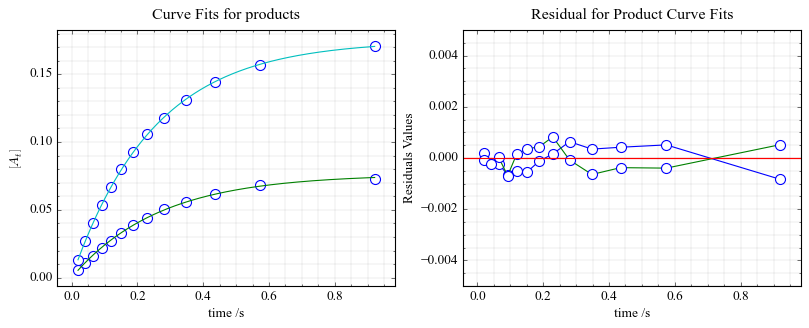

the R^2 value for the second-order model for A -> C fit is 0.9999
the R^2 value for the first-order model for A -> B fit is 0.9995

The combined rate constant, k_obs, using [B] is 3.78 +/- 0.108 /s
The final conc. of B is 0.076 +/- 0.00103 moles/L
The combined rate constant, k_obs, using [C] is 4.02 +/- 0.046 /s
The final conc. of C is 0.175 +/- 0.00092 moles/L


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#####################
### Load data set ###
#####################

filename = "Mystery_Reaction.csv"
df = pd.read_csv(path + "6_PhysOrgExamples/" + filename)         # Load data from .csv format into dataframe

df = df.dropna()                   # strip away any lines with "NaN" values (blanks)
display(df.head(3))                # Show header and first three lines of dataframe

####################################################
### Functions that define models for curve fits  ###
####################################################

### Define function for product in second order integrated rate law
def Product(t, k, P_inf):
    P = P_inf*(1-np.exp(-k*t))
    return P


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

plt.style.use(path + "S2_classic2.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))  
ax[0].margins(x=.07, y=.07, tight=True)                     # add 7% empty space around outside of plot area   
ax[1].margins(x=.07, y=.07, tight=True)                     # add 7% empty space around outside of plot area   


#####################################################
### Get series of data to plot from the dataframe ###
#####################################################

Bt = df["Product A"]
Ct = df["Product B"]
t = df["time"]


####################################################################
### Plot the data and curve fit for product B vs. time in ax[0]  ###
####################################################################

### Plot data and setup labels
ax[0].plot(t, Bt, "o")
ax[0].set(title="Curve Fits for products",       
          ylabel=r"$\left[ A_t \right]$", 
          xlabel="time /s",                
#          xlim=[0,100],                  
#          ylim=[-1,7]
          )   

### perform curve fit for first order reaction. Product B
popt1, pcov1 = curve_fit(Product, t, Bt, p0=[0,.3]) # p0 is a list of initial guesses for parameters
#print(popt1)
k1 = popt1[0]
B_inf = popt1[1]

### Calculate standard deviations from covariance matrix
[stdev_k1, stdev_B_inf] = np.sqrt(np.diag(pcov1))

### plot curve fit for first order reaction. Product B
t_series = np.linspace(np.min(t), np.max(t), 1000)
fity=Product(t_series, k1, B_inf)
ax[0].plot(t_series, fity, "-")


####################################################################
### Plot the data and curve fit for product B vs. time in ax[0]  ###
####################################################################

### Plot data
ax[0].plot(t, Ct, "o")

### perform curve fit for first order reaction. Product C
popt2, pcov2 = curve_fit(Product, t, Ct, p0=[0,.3]) # p0 is a list of initial guesses for parameters
#print(popt2)
k2 = popt2[0]
C_inf = popt2[1]

[stdev_k2, stdev_C_inf] = np.sqrt(np.diag(pcov2))

### plot curve fit for first order reaction. Product C
t_series = np.linspace(np.min(t), np.max(t), 1000)
fity=Product(t_series, k2, C_inf)
ax[0].plot(t_series, fity, "-")


###########################################################
### Plot the residuals for product B vs. time in ax[1]  ###
###########################################################

xdata=t  # The code that I stole from the web uses these terms for x and y data.
ydata=Bt

### Calculate R^2 for First order fit
residuals = ydata- Product(xdata, *popt1)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared_1 = 1 - (ss_res / ss_tot)

### Plot the residuals in ax[1]
ax[1].plot(xdata, residuals, "o-")
ax[1].axhline(y = 0.0, color = 'r', linestyle = '-')


###########################################################
### Plot the residuals for product B vs. time in ax[1]  ###
###########################################################

xdata=t   # The code that I stole from the web uses these terms for x and y data.
ydata=Ct

### Calculate R^2 for second-order model fit
residuals = ydata- Product(xdata, *popt2)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared_2 = 1 - (ss_res / ss_tot)

### Plot the residuals in ax[1]
ax[1].plot(xdata, residuals, "o-")

### Set up axis labels for ax[1]
ax[1].axhline(y = 0.0, color = 'r', linestyle = '-')
ax[1].set(title="Residual for Product Curve Fits",       
          ylabel=r"Residuals Values", 
          xlabel="time /s",                
          ylim=[-0.005,0.005],                  
#          xlim=[-1,7]
          )   

#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the two plots


###########################################
### print the calculated values for R^2 ###
### print parameters with standard dev. ###
###########################################

print(f"the R^2 value for the second-order model for A -> C fit is {r_squared_2:0.4f}")
print(f"the R^2 value for the first-order model for A -> B fit is {r_squared_1:0.4f}")
print()
print(f"The combined rate constant, k_obs, using [B] is {k1:0.2f} +/- {2*stdev_k1:0.3f} /s")
print(f"The final conc. of B is {B_inf:0.3f} +/- {2*stdev_B_inf:0.5f} moles/L")
print(f"The combined rate constant, k_obs, using [C] is {k2:0.2f} +/- {2*stdev_k2:0.3f} /s")
print(f"The final conc. of C is {C_inf:0.3f} +/- {2*stdev_C_inf:0.5f} moles/L")


## The Data Set

Take the following data and create a text file named `Mystery_Reaction.csv` in the same directory as the Jupyter notebook.
```text
time,Reactant,Product A,Product B
0.00E+00,2.50E-01,,
1.95E-02,2.31E-01,5.63E-03,1.31E-02
4.16E-02,2.13E-01,1.09E-02,2.67E-02
6.46E-02,1.94E-01,1.63E-02,4.00E-02
9.19E-02,1.75E-01,2.17E-02,5.33E-02
1.19E-01,1.56E-01,2.71E-02,6.66E-02
1.51E-01,1.38E-01,3.26E-02,7.99E-02
1.87E-01,1.19E-01,3.85E-02,9.28E-02
2.29E-01,1.00E-01,4.43E-02,1.06E-01
2.80E-01,8.13E-02,5.04E-02,1.18E-01
3.48E-01,6.25E-02,5.61E-02,1.31E-01
4.35E-01,4.38E-02,6.19E-02,1.44E-01
5.74E-01,2.50E-02,6.80E-02,1.57E-01
9.21E-01,6.25E-03,7.30E-02,1.71E-01
2.92E+00,,7.48E-02,1.75E-01
```